In [1]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM , Dropout
from tensorflow.keras.callbacks import ModelCheckpoint , EarlyStopping

In [5]:
data = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\NVIDIA_STOCK.csv")
df = data.copy()

In [7]:
def check_df(data):
    print("------------------------------- SHAPE -------------------------------")
    print(data.shape)
    print("------------------------------- INFO -------------------------------")
    print(data.info())
    print("------------------------------- ISNA -------------------------------")
    print(data.isna().sum().sort_values(ascending=False))
    print("------------------------------- NUNIQUE -------------------------------")
    print(data.nunique())
    print("------------------------------- DESCRIBE -------------------------------")
    display(data.describe())
    print("------------------------------- HEAD -------------------------------")
    display(data.head())
    print("------------------------------- TAIL -------------------------------")
    display(data.tail())

In [9]:
check_df(df)

------------------------------- SHAPE -------------------------------
(1699, 7)
------------------------------- INFO -------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1699 non-null   object
 1   Adj Close  1698 non-null   object
 2   Close      1698 non-null   object
 3   High       1698 non-null   object
 4   Low        1698 non-null   object
 5   Open       1698 non-null   object
 6   Volume     1698 non-null   object
dtypes: object(7)
memory usage: 93.0+ KB
None
------------------------------- ISNA -------------------------------
Adj Close    1
Close        1
High         1
Low          1
Open         1
Volume       1
Price        0
dtype: int64
------------------------------- NUNIQUE -------------------------------
Price        1699
Adj Close    1686
Close        1675
High         1663
Low          1673

,Price,Adj Close,Close,High,Low,Open,Volume
count,1699,1698,1698,1698,1698,1698,1698
unique,1699,1686,1675,1663,1673,1663,1696
top,Ticker,4.585628509521484,13.3412504196167,13.838000297546387,6.168749809265137,5.949999809265137,656912000
freq,1,2,2,3,3,3,2


------------------------------- HEAD -------------------------------


,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000


------------------------------- TAIL -------------------------------


,Price,Adj Close,Close,High,Low,Open,Volume
1694,2024-09-24,120.8616714477539,120.87000274658203,121.80000305175781,115.37999725341797,116.5199966430664,354966800
1695,2024-09-25,123.50149536132812,123.51000213623047,124.94000244140625,121.61000061035156,122.0199966430664,284692900
1696,2024-09-26,124.03145599365234,124.04000091552734,127.66999816894531,121.80000305175781,126.80000305175781,302582900
1697,2024-09-27,121.39163970947266,121.4000015258789,124.02999877929688,119.26000213623047,123.97000122070312,271009200
1698,2024-09-30,121.43163299560547,121.44000244140625,121.5,118.1500015258789,118.30999755859375,226553700


In [11]:
df = df.dropna()

In [13]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA
2,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
3,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
4,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000
5,2018-01-05,5.326793670654297,5.385000228881836,5.422749996185303,5.2769999504089355,5.354750156402588,580124000


In [15]:
df = df.drop(index=[0]).reset_index(drop=True)

In [17]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
0,2018-01-02,4.929879665374756,4.983749866485596,4.987500190734863,4.862500190734863,4.894499778747559,355616000
1,2018-01-03,5.254334926605225,5.3117499351501465,5.34250020980835,5.09375,5.102499961853027,914704000
2,2018-01-04,5.2820329666137695,5.339749813079834,5.451250076293945,5.317249774932861,5.394000053405762,583268000
3,2018-01-05,5.326793670654297,5.385000228881836,5.422749996185303,5.2769999504089355,5.354750156402588,580124000
4,2018-01-08,5.490012168884277,5.550000190734863,5.625,5.4644999504089355,5.510000228881836,881216000


In [19]:
df["Price"] = pd.to_datetime(df["Price"])
df["Close"] = df["Close"].astype('float')
df["Adj Close"] = df["Adj Close"].astype('float')
df["High"] = df["High"].astype('float')
df["Low"] = df["Low"].astype('float')
df["Open"] = df["Open"].astype('float')

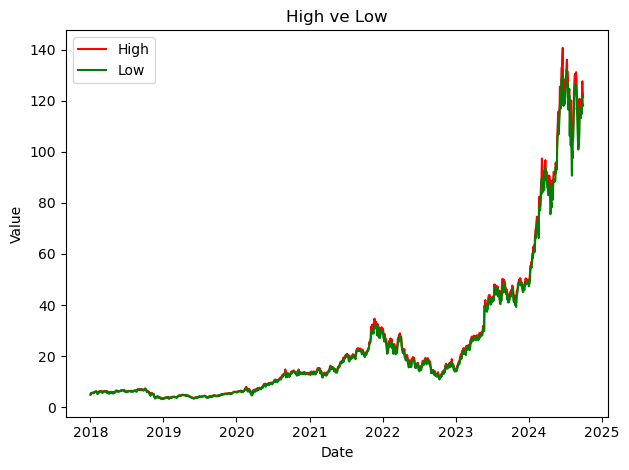

In [21]:
sns.lineplot(data=df, x='Price', y='High', label='High',color="r")
sns.lineplot(data=df, x='Price', y='Low', label='Low',color="g")
plt.title('High ve Low')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

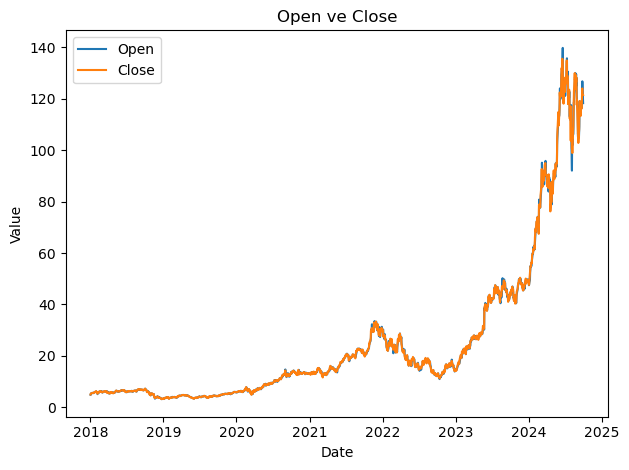

In [23]:
sns.lineplot(data=df, x='Price', y='Open', label='Open')
sns.lineplot(data=df, x='Price', y='Close', label='Close')
plt.title('Open ve Close')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

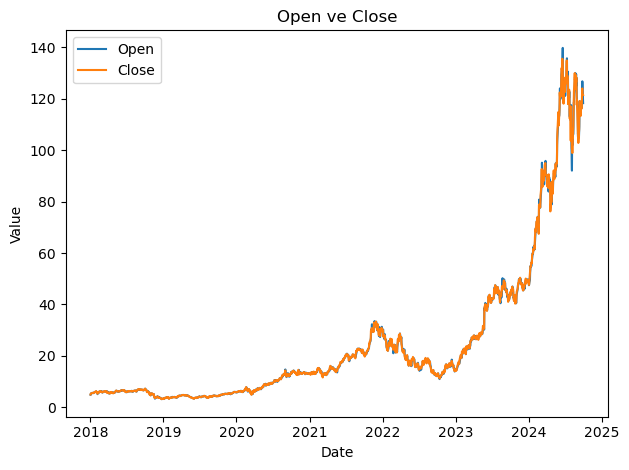

In [25]:
sns.lineplot(data=df, x='Price', y='Open', label='Open')
sns.lineplot(data=df, x='Price', y='Close', label='Close')
plt.title('Open ve Close')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

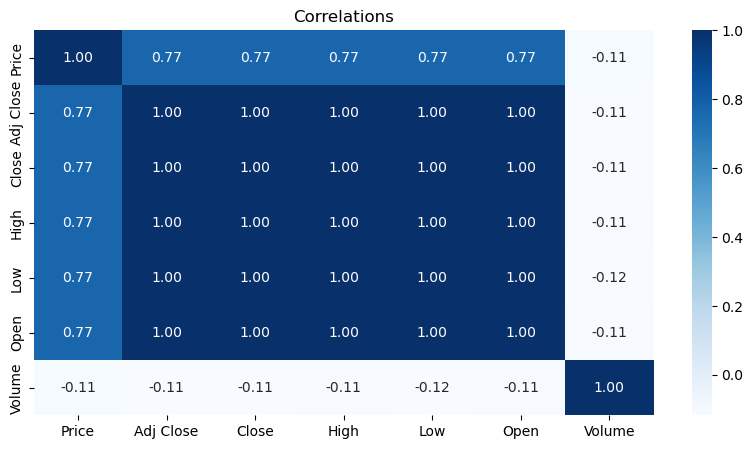

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="Blues")
plt.title("Correlations")
plt.show()

In [29]:
nvidia_df = df[["Price","Close"]]

In [31]:
nvidia_df.head()

,Price,Close
0,2018-01-02,4.98375
1,2018-01-03,5.31175
2,2018-01-04,5.33975
3,2018-01-05,5.38500
4,2018-01-08,5.55000


In [33]:
print("Minimum Date : ",nvidia_df["Price"].min())
print("Maximum Date : ",nvidia_df["Price"].max())

Minimum Date :  2018-01-02 00:00:00
Maximum Date :  2024-09-30 00:00:00


In [35]:
nvidia_df.index = nvidia_df["Price"]

In [41]:
nvidia_df.head()

,Close
Price,
2018-01-02,4.98375
2018-01-03,5.31175
2018-01-04,5.33975
2018-01-05,5.38500
2018-01-08,5.55000


In [43]:
result_df = nvidia_df.copy()

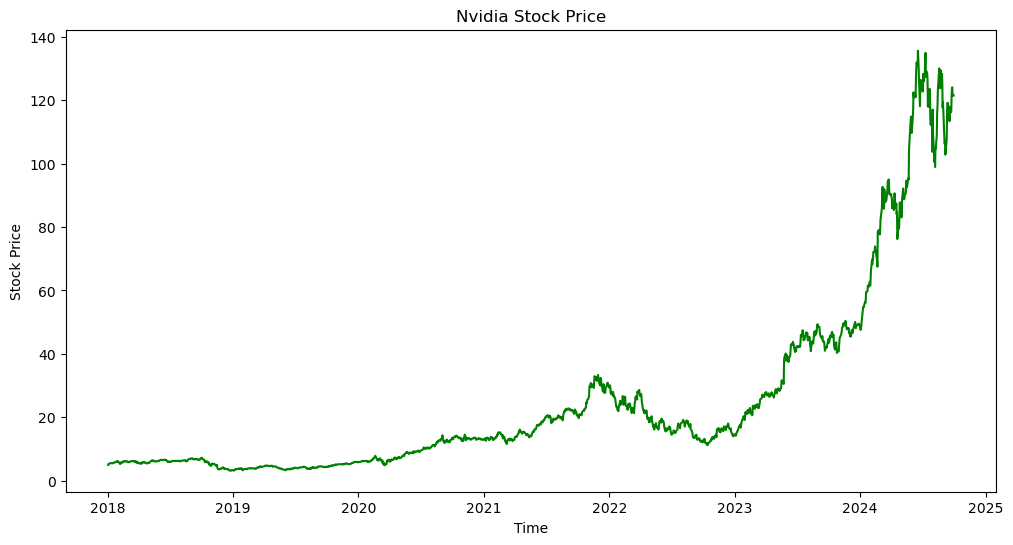

In [45]:
plt.figure(figsize=(12,6))
plt.plot(nvidia_df["Close"],color="g")
plt.title('Nvidia Stock Price')
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.show()

In [47]:
nvidia_df = nvidia_df.values

In [49]:
nvidia_df[0:5]

array([[4.98374987],
       [5.31174994],
       [5.33974981],
       [5.38500023],
       [5.55000019]])

In [51]:
nvidia_df = nvidia_df.astype('float32')

In [53]:
def split_data(data,test_size):
    pos = int(round(len(data)*(1-test_size)))
    train = data[:pos]
    test = data[pos:]
    return train , test , pos

In [55]:
train , test , pos = split_data(nvidia_df,0.15)

In [57]:
print(train.shape , test.shape)

(1442, 1) (255, 1)


In [59]:
scaler_train = MinMaxScaler(feature_range=(0,1))
scaler_test = MinMaxScaler(feature_range=(0,1))

In [61]:
train = scaler_train.fit_transform(train)

In [63]:
test = scaler_test.fit_transform(test)

In [65]:
train[0:5]

array([[0.03912577],
       [0.04622872],
       [0.04683506],
       [0.04781498],
       [0.05138811]], dtype=float32)

In [67]:
test[0:5]

array([[0.01663974],
       [0.02248725],
       [0.02900669],
       [0.03331095],
       [0.04678023]], dtype=float32)

In [69]:
def create_features(data,lb):
    X,Y = [],[]
    for i in range(lb,len(data)):
        X.append(data[i-lb:i,0])
        Y.append(data[i,0])

    return np.array(X),np.array(Y)

In [71]:
lb = 20

In [73]:
X_train , Y_train = create_features(train,lb)
X_test , Y_test = create_features(test,lb)

In [75]:
print(f"X Train Shape : {X_train.shape}\nY Train Shape : {Y_train.shape}\nX Test Shape : {X_test.shape}\nY Test Shape : {Y_test.shape}")

X Train Shape : (1422, 20)
Y Train Shape : (1422,)
X Test Shape : (235, 20)
Y Test Shape : (235,)


In [77]:
X_train = np.reshape(X_train , (X_train.shape[0],1,X_train.shape[1]))
X_test = np.reshape(X_test , (X_test.shape[0],1,X_test.shape[1]))

Y_train = Y_train.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)

In [79]:
print(f"X Train Shape : {X_train.shape}\nY Train Shape : {Y_train.shape}\nX Test Shape : {X_test.shape}\nY Test Shape : {Y_test.shape}")

X Train Shape : (1422, 1, 20)
Y Train Shape : (1422, 1)
X Test Shape : (235, 1, 20)
Y Test Shape : (235, 1)


In [81]:
model = Sequential()
model.add(LSTM(units=100,
         activation='relu',
         input_shape=(X_train.shape[1],lb)))
model.add(Dropout(0.2))
model.add(Dense(1))

C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [83]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        48,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,501 (189.46 KB)

 Trainable params: 48,501 (189.46 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [87]:
callbacks = [EarlyStopping(monitor='val_loss',patience=3,verbose=1,mode='min'),
            ModelCheckpoint(filepath='mymodel.keras',monitor='val_loss',mode='min',
                           save_best_only=True,save_weights_only=False,verbose=1)]

In [89]:
history = model.fit(x=X_train,
                   y=Y_train,
                   epochs=100,
                   batch_size=32,
                   validation_data=(X_test,Y_test),
                   callbacks = callbacks,
                   shuffle=False)

Epoch 1/100
37/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0021
Epoch 1: val_loss improved from inf to 0.00747, saving model to mymodel.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0024 - val_loss: 0.0075
Epoch 2/100
40/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 2: val_loss did not improve from 0.00747
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0023 - val_loss: 0.0075
Epoch 3/100
43/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011    
Epoch 3: val_loss improved from 0.00747 to 0.00683, saving model to mymodel.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - val_loss: 0.0068
Epoch 4/100
37/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0018    
Epoch 4: val_loss improved from 0.00683 to 0.00626, saving model to mymodel.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - val_loss: 0.0063
Epoch 5/100
37/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027
Epoch 5: val_loss improved from 0.00626 to 0.00565, saving model to mymodel.kera

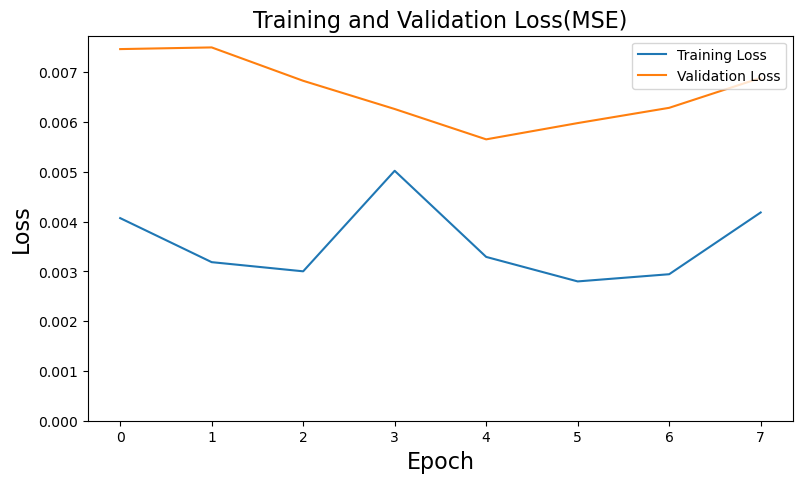

In [91]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label='Training Loss')
plt.plot(history.history["val_loss"],label='Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss(MSE)',fontsize=16)
plt.show()

In [93]:
loss=model.evaluate(X_test,Y_test,batch_size=32)
print("Test Loss(MSE) : %.2f%%"% (100*loss))

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0052 
Test Loss(MSE) : 0.69%


In [95]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [97]:
train_predict = scaler_train.inverse_transform(train_predict)
test_predict = scaler_test.inverse_transform(test_predict)

In [99]:
Y_train = scaler_train.inverse_transform(Y_train)
Y_test = scaler_test.inverse_transform(Y_test)

In [101]:
train_rmse = np.sqrt(mean_squared_error(Y_train,train_predict))

In [103]:
test_rmse = np.sqrt(mean_squared_error(Y_test,test_predict))

In [105]:
print(f"Train RMSE : {train_rmse:.4f}")
print(f"Test RMSE : {test_rmse:.4f}")

Train RMSE : 1.6037
Test RMSE : 7.9054


In [109]:
train_prediction_df = result_df[lb:pos]
train_prediction_df["Predicted"] = train_predict
train_prediction_df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_17592\4252203772.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_prediction_df["Predicted"] = train_predict


,Close,Predicted
Price,,
2018-01-31,6.1450,4.718894
2018-02-01,6.0125,4.779974
2018-02-02,5.8380,4.809079
2018-02-05,5.3425,4.835376
2018-02-06,5.6395,4.790513


In [111]:
test_prediction_df = result_df[pos+lb:]
test_prediction_df["Predicted"] = test_predict
test_prediction_df.head()

C:\Users\dell\AppData\Local\Temp\ipykernel_17592\1510422217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_prediction_df["Predicted"] = test_predict


,Close,Predicted
Price,,
2023-10-24,43.662998,41.805550
2023-10-25,41.778999,41.878342
2023-10-26,40.326000,41.730450
2023-10-27,40.500000,41.535965
2023-10-30,41.160999,41.302456


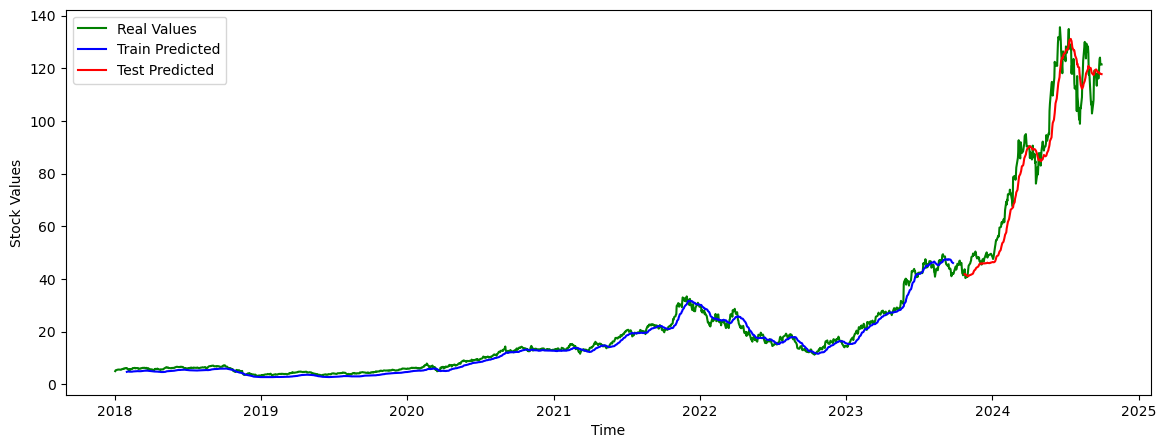

In [113]:
plt.figure(figsize=(14,5))
plt.plot(result_df , label='Real Values',color='g')
plt.plot(train_prediction_df["Predicted"],color="b",label="Train Predicted")
plt.plot(test_prediction_df["Predicted"],color="red",label="Test Predicted")
plt.xlabel('Time')
plt.ylabel('Stock Values')
plt.legend()
plt.show()

In [115]:
future_days = 5
last_data = X_test[-1:]  

future_predictions = []
for i in range(future_days):
    
    pred = model.predict(last_data)
    
   
    pred = np.repeat(pred.reshape(1, 1, 1), 20, axis=2) 
    
    
    future_predictions.append(pred[0, 0, 0]) 
    
    
    last_data = np.concatenate((last_data[:, 1:, :], pred), axis=1)


scaled_predictions = np.array(future_predictions).reshape(-1, 1) 
real_predictions = scaler_test.inverse_transform(scaled_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


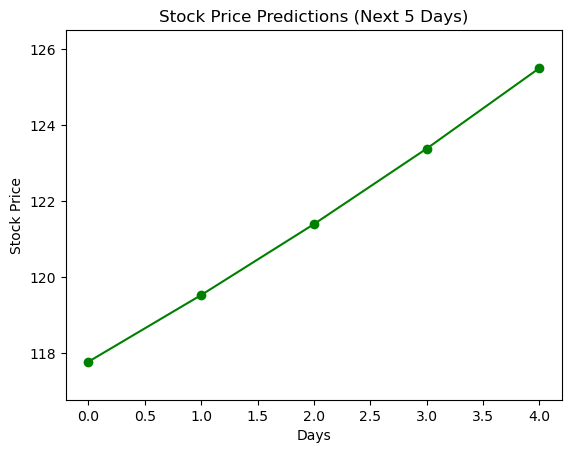

In [117]:
plt.plot(real_predictions, marker='o',color="g")
plt.title('Stock Price Predictions (Next 5 Days)')
plt.ylim(min(real_predictions) - 1, max(real_predictions) + 1)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()

In [119]:
real_predictions

array([[117.76959 ],
       [119.5229  ],
       [121.38756 ],
       [123.37329 ],
       [125.491066]], dtype=float32)